In [ ]:
import numpy as np
import os

# Directory containing the .npy files
data_dir_ml3d = '..\\HumanML3D'
data_dir_kit = '..\\KIT-ML'

# Load an example file
example_id_ml3d = "000002"
example_id_kit = "00001"

print("----new_joints----")

example_data_ml3d = np.load(os.path.join(data_dir_ml3d, "new_joints", example_id_ml3d + '.npy'))
print(f"ML3D: Shape of the example data: {example_data_ml3d.shape}")
print("ML3D: First frame of the example data (x, y, z coordinates for each joint):")
print(example_data_ml3d[0])

example_data_kit = np.load(os.path.join(data_dir_kit, "new_joints", example_id_kit + '.npy'))
print(f"KIT-ML: Shape of the example data: {example_data_kit.shape}")
# print("KIT-ML: First frame of the example data (x, y, z coordinates for each joint):")
# print(example_data_ml3d[0])

print("----new_joint_vecs----")
example_data_ml3d_vecs = np.load(os.path.join(data_dir_ml3d, "new_joint_vecs", example_id_ml3d + '.npy'))
example_data_kit_vecs = np.load(os.path.join(data_dir_kit, "new_joint_vecs", example_id_kit + '.npy'))
print(f"ML3D: Shape of the example data: {example_data_ml3d_vecs.shape}")
print(f"KIT-ML: Shape of the example data: {example_data_kit_vecs.shape}")



----new_joints----
ML3D: Shape of the example data: (35, 22, 3)
ML3D: First frame of the example data (x, y, z coordinates for each joint):
[[ 0.          0.9842473   0.        ]
 [ 0.06534226  0.9159177   0.04105727]
 [-0.06232499  0.90621614  0.04583763]
 [ 0.00195501  1.1157571  -0.00339643]
 [ 0.18902664  0.545689   -0.00965902]
 [-0.15980993  0.53063244  0.00484473]
 [ 0.00182559  1.2317932  -0.08729566]
 [ 0.21943116  0.13878757  0.13353714]
 [-0.15707278  0.13578278  0.16377436]
 [-0.00598339  1.2842462  -0.10916828]
 [ 0.29130864  0.06292834  0.035367  ]
 [-0.21737015  0.03269101  0.0739835 ]
 [-0.02752716  1.4798334  -0.20612359]
 [ 0.05824355  1.3933759  -0.16272402]
 [-0.09288167  1.3872848  -0.15805978]
 [-0.03659823  1.5577512  -0.2729338 ]
 [ 0.1897318   1.3990817  -0.16346012]
 [-0.21521598  1.3798116  -0.16824049]
 [ 0.30337024  1.1816479  -0.08746239]
 [-0.29188883  1.1418192  -0.08639801]
 [ 0.3953352   0.93356496 -0.11502144]
 [-0.3651448   0.8826398  -0.10351266]]
K

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

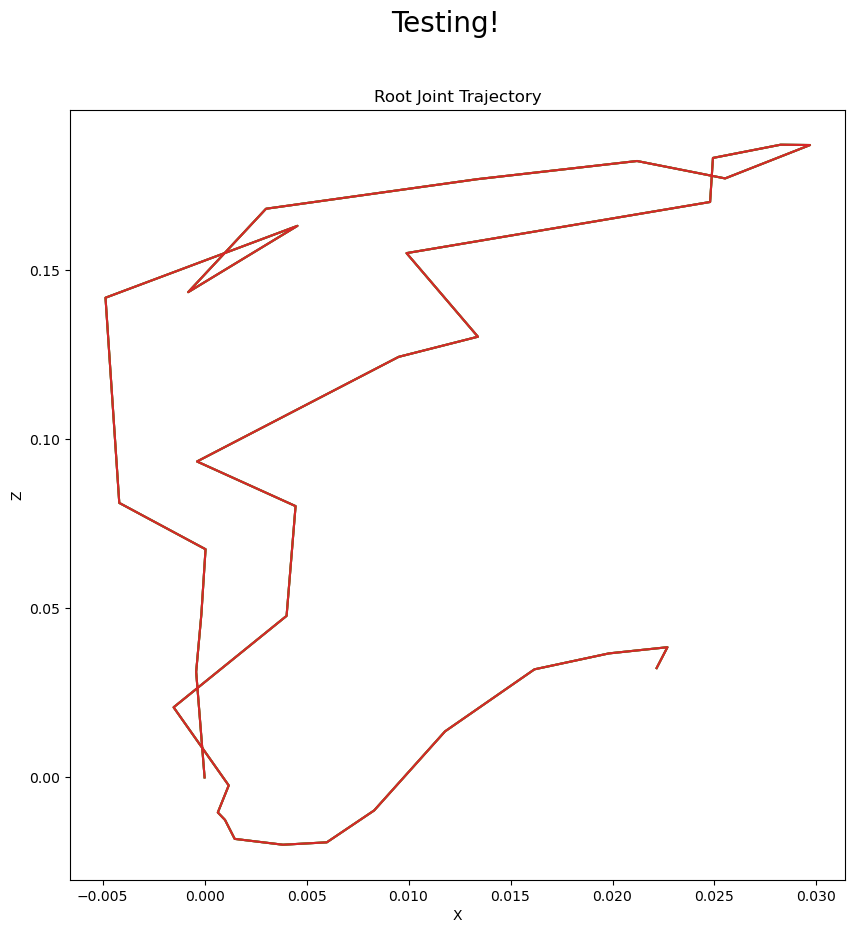

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from utils.motion_process import recover_from_ric
import torch
from utils.plot_script import plot_3d_motion
from utils.utils import motion_temporal_filter
%matplotlib inline

joints_num = 22
kinematic_chain_ml3d = [[0, 2, 5, 8, 11], [0, 1, 4, 7, 10], [0, 3, 6, 9, 12, 15], [9, 14, 17, 19, 21], [9, 13, 16, 18, 20]]
# print(example_data_ml3d[0:5])

joint = recover_from_ric(torch.from_numpy(example_data_ml3d_vecs).float(), joints_num).numpy()
trajectory = joint[:, 0, :]
# print(trajectory)
plt.plot(trajectory[:, 0], trajectory[:, 2])  # Plot X-Z movement
plt.xlabel('X')
plt.ylabel('Z')
plt.title('Root Joint Trajectory')
plt.show()
# joint = motion_temporal_filter(joint, sigma=1)
# plot_3d_motion("test_ani.mp4", kinematic_chain, joint, title="Testing!", fps=20)


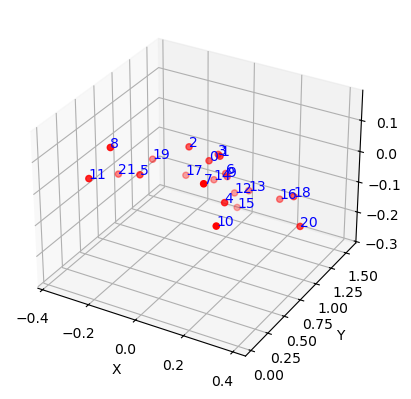

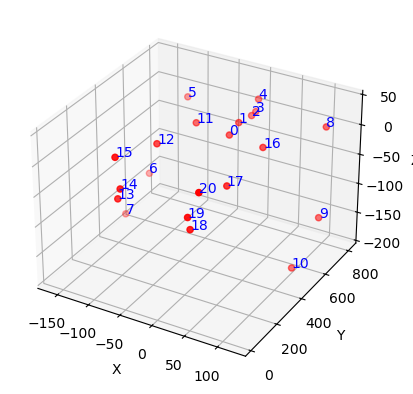

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_pose_3d(joint_positions):
    # print(joint_positions.shape)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x, y, z = joint_positions[:, 0], joint_positions[:, 1], joint_positions[:, 2]
    ax.scatter(x, y, z, c='r', marker='o')
    
    for i, coord in enumerate(zip(x, y, z)):
        ax.text(coord[0], coord[1], coord[2], f"{i}", color='blue')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

# Visualize the first frame
first_frame_ml3d = example_data_ml3d[0].reshape(-1, 3)
visualize_pose_3d(first_frame_ml3d)
first_frame_kit = example_data_kit[0].reshape(-1, 3)
visualize_pose_3d(first_frame_kit)


In [4]:
sys.path.append(os.path.dirname(os.path.dirname(__file__)))
import sys
import os
from os.path import join as pjoin
from  text_process import process_humanml3d

file = open(pjoin(data_dir_ml3d, "texts", "000000.txt"), "r", encoding="utf-8")
content = file.read()
print(content)

a man kicks something or someone with his left leg.#a/DET man/NOUN kick/VERB something/PRON or/CCONJ someone/PRON with/ADP his/DET left/ADJ leg/NOUN#0.0#0.0
the standing person kicks with their left foot before going back to their original stance.#the/DET stand/VERB person/NOUN kick/VERB with/ADP their/DET left/ADJ foot/NOUN before/ADP go/VERB back/ADV to/ADP their/DET original/ADJ stance/NOUN#0.0#0.0
a man kicks with something or someone with his left leg.#a/DET man/NOUN kick/VERB with/ADP something/PRON or/CCONJ someone/PRON with/ADP his/DET left/ADJ leg/NOUN#0.0#0.0
he is flying kick with his left leg#he/PRON is/AUX fly/VERB kick/NOUN with/ADP his/DET left/ADJ leg/NOUN#0.0#0.0

